In [1]:
import numpy as np
import pandas as pd
from numpy import linalg
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('/Users/michaelguel/Desktop/ProjectData/sustainable_energy.csv')

sdg = pd.read_csv('/Users/michaelguel/Desktop/ProjectData/SDR2023-2000SDG.csv',encoding='unicode_escape')

In [3]:
sdguse = sdg.copy().iloc[:,1:5]

In [4]:
sdg2020 = sdguse[sdguse['year'] <= 2020].copy()
datamanip = data.copy()

takeoutsdg = ['Small Island Developing States',
           'OECD members',
           'Middle East and North Africa',
           'Upper-middle-income Countries',
           'Lower-middle-income Countries',
           'Lower & Lower-middle Income',
           'Low-income Countries',
           'High-income Countries',
           'World',
           'Bolivia',
           'Brunei Darussalam', 
           'Cabo Verde', 
           'Congo, Rep.',
           "Cote d'Ivoire", 
           'East and South Asia',
           'Eastern Europe and Central Asia',
           'Iran, Islamic Rep.',
           'Korea, Rep.', 
           'Lao PDR', 
           'Latin America and the Caribbean',
           'Moldova', 
           'Oceania',
           'Russian Federation', 
           'Sub-Saharan Africa',
           'Syrian Arab Republic', 
           'Tanzania', 
           'Venezuela, RB', 
           'Vietnam']
takeoutdata = ['Antigua and Barbuda', 
               'Aruba',
               'Bermuda',
               'Cayman Islands',
               'Dominica',
               'Equatorial Guinea', 
               'Eritrea',
               'French Guiana',
               'Grenada', 
               'Guinea-Bissau', 
               'Kiribati',
               'Libya', 
               'Nauru',
               'New Caledonia', 
               'Puerto Rico',
               'Saint Kitts and Nevis',
               'Saint Lucia', 
               'Saint Vincent and the Grenadines', 
               'Samoa',
               'Seychelles',
               'Solomon Islands', 
               'Tonga', 
               'Tuvalu', 
               'Vanuatu']

droppedsdg = sdg2020[~sdg2020['Country'].isin(set(takeoutsdg))]
droppeddata = datamanip[~datamanip['country'].isin(set(takeoutdata))]

In [5]:
sdgreplacecopy = droppedsdg.copy()
sdgcomplete = sdgreplacecopy.replace(['Bahamas, The',
            'Congo, Dem. Rep.',
            'Egypt, Arab Rep.',
            'Gambia, The',
            'Kyrgyz Republic',
            'Slovak Republic',
            'Türkiye',
            'Yemen, Rep.'],['Bahamas',
      'Congo',
      'Egypt',
      'Gambia',
      'Kyrgyzstan',
      'Slovakia',
      'Turkey',
      'Yemen'])

sdgcomplete

,Country,year,population,SDG Index Score
0,Afghanistan,2000,19669913.0,36.0
1,Afghanistan,2001,19416052.0,36.3
2,Afghanistan,2002,19961213.0,36.3
3,Afghanistan,2003,22039300.0,36.7
4,Afghanistan,2004,23250960.0,37.1
...,...,...,...,...
4133,Zimbabwe,2016,14303586.0,56.1
4134,Zimbabwe,2017,14601823.0,56.4
4135,Zimbabwe,2018,14900379.0,55.9
4136,Zimbabwe,2019,15203989.0,53.7


In [6]:
sdgcomplete['combined'] = sdgcomplete['Country'] + sdgcomplete['year'].astype(str)

takeoutdatanot = ['Montenegro2000', 'Montenegro2001', 'Montenegro2002',
               'Montenegro2003', 'Montenegro2004', 'Montenegro2005',
               'Montenegro2006', 'Serbia2000', 'Serbia2001', 'Serbia2002',
               'Serbia2003', 'Serbia2004', 'Serbia2005', 'Serbia2006',
               'South Sudan2000', 'South Sudan2001', 'South Sudan2002',
               'South Sudan2003', 'South Sudan2004', 'South Sudan2005',
               'South Sudan2006', 'South Sudan2007', 'South Sudan2008',
               'South Sudan2009', 'South Sudan2010', 'South Sudan2011',
               'South Sudan2012']

sdgdone = sdgcomplete[~sdgcomplete['combined'].isin(set(takeoutdatanot))].rename(columns = {'Country':'country'})

In [7]:
joined = pd.merge(droppeddata,sdgdone, on=['country','year'],how='inner')

joined['density'] = joined['density'].replace(',','',regex=True).astype(float)

final = joined.drop(['renew_capacity_pcapita','financial_flows_usd','renew_prim_ene_pct','combined'],axis=1)


In [8]:
final.isna().sum()

country                      0
year                         0
elec_access_pct              7
clean_fuels_access_pct      42
renew_consump_pct          171
elec_fossil_fuels_twh        0
elec_nuclear_twh           105
elec_renew_twh               0
low_carbon_elec_pct          0
primaryconsumpt_pcapita      0
energy_intensity-level     159
co2_emissions_kt           312
gdp_growth                 209
gdp_per_capita             190
density                      0
land_area                    0
lat                          0
long                         0
population                   0
SDG Index Score              0
dtype: int64

In [10]:
checks = final[final.isna().any(axis=1)].copy()

In [9]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import ExtraTreesRegressor

In [11]:
impdata = final.iloc[:,np.r_[2:14,18]].copy()

impcols = list(impdata.columns)

imputer = IterativeImputer(estimator=ExtraTreesRegressor(),max_iter = 100, tol=1e-4,random_state=0)

imputed_data = imputer.fit_transform(impdata)

impdf1 = pd.DataFrame(imputed_data, columns = impcols)

In [12]:
impdf1['SDG_score'] = final['SDG Index Score']

impdf1['density'] = final['density']

impdf1

,elec_access_pct,clean_fuels_access_pct,renew_consump_pct,elec_fossil_fuels_twh,elec_nuclear_twh,elec_renew_twh,low_carbon_elec_pct,primaryconsumpt_pcapita,energy_intensity-level,co2_emissions_kt,gdp_growth,gdp_per_capita,population,SDG_score,density
0,1.613591,6.2,44.99,0.16,0.0,0.31,65.957440,302.59482,1.64,760.000000,7.156191,441.835435,19669913.0,36.0,60.0
1,4.074574,7.2,45.60,0.09,0.0,0.50,84.745766,236.89185,1.74,730.000000,7.468072,365.087346,19416052.0,36.3,60.0
2,9.409158,8.2,37.83,0.13,0.0,0.56,81.159424,210.86215,1.40,1029.999971,7.617574,179.426579,19961213.0,36.3,60.0
3,14.738506,9.5,36.66,0.31,0.0,0.63,67.021280,229.96822,1.40,1220.000029,8.832278,190.683814,22039300.0,36.7,60.0
4,20.064968,10.9,44.24,0.33,0.0,0.56,62.921350,204.23125,1.20,1029.999971,1.414118,211.382074,23250960.0,37.1,60.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3160,42.561730,29.8,81.90,3.50,0.0,3.32,48.680350,3227.68020,10.00,11020.000460,0.755869,1464.588957,14303586.0,56.1,38.0
3161,44.178635,29.8,82.46,3.05,0.0,4.30,58.503407,3068.01150,9.51,10340.000150,4.709492,1235.189032,14601823.0,56.4,38.0
3162,45.572647,29.9,80.23,3.73,0.0,5.46,59.412407,3441.98580,9.83,12380.000110,4.824211,1254.642265,14900379.0,55.9,38.0
3163,46.781475,30.1,81.50,3.66,0.0,4.58,55.582527,3003.65530,10.47,11760.000230,-6.144236,1316.740657,15203989.0,53.7,38.0


In [13]:
impdf = impdf1.copy()

In [769]:
pd.reset_option('all')

/var/folders/x8/mkln34_j4hggmyw8kdvw75gc0000gn/T/ipykernel_12466/2786130087.py:1: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  pd.reset_option('all')


In [14]:
mat = impdf.corr(method='pearson')

uppcor = mat.where(np.triu(np.ones(mat.shape), k=1).astype(bool))

uniq = uppcor.unstack().dropna()

sormat = uniq.sort_values(ascending =False)

sormat.shape

abs(mat['SDG_score']).sort_values(ascending=False)

SDG_score                  1.000000
elec_access_pct            0.846762
clean_fuels_access_pct     0.835282
renew_consump_pct          0.618989
gdp_per_capita             0.582834
primaryconsumpt_pcapita    0.412230
energy_intensity-level     0.263178
gdp_growth                 0.218192
elec_nuclear_twh           0.199476
elec_renew_twh             0.175119
elec_fossil_fuels_twh      0.114812
co2_emissions_kt           0.110260
low_carbon_elec_pct        0.044636
density                    0.034995
population                 0.019181
Name: SDG_score, dtype: float64

In [15]:
impdf.iloc[:,np.r_[3,5,7:10,11:13]] = impdf.iloc[:,np.r_[3,5,7:10,11:13]]  + .001

impdf

,elec_access_pct,clean_fuels_access_pct,renew_consump_pct,elec_fossil_fuels_twh,elec_nuclear_twh,elec_renew_twh,low_carbon_elec_pct,primaryconsumpt_pcapita,energy_intensity-level,co2_emissions_kt,gdp_growth,gdp_per_capita,population,SDG_score,density
0,1.613591,6.2,44.99,0.161,0.0,0.311,65.957440,302.59582,1.641,760.001000,7.156191,441.836435,1.966991e+07,36.0,60.0
1,4.074574,7.2,45.60,0.091,0.0,0.501,84.745766,236.89285,1.741,730.001000,7.468072,365.088346,1.941605e+07,36.3,60.0
2,9.409158,8.2,37.83,0.131,0.0,0.561,81.159424,210.86315,1.401,1030.000971,7.617574,179.427579,1.996121e+07,36.3,60.0
3,14.738506,9.5,36.66,0.311,0.0,0.631,67.021280,229.96922,1.401,1220.001029,8.832278,190.684814,2.203930e+07,36.7,60.0
4,20.064968,10.9,44.24,0.331,0.0,0.561,62.921350,204.23225,1.201,1030.000971,1.414118,211.383074,2.325096e+07,37.1,60.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3160,42.561730,29.8,81.90,3.501,0.0,3.321,48.680350,3227.68120,10.001,11020.001460,0.755869,1464.589957,1.430359e+07,56.1,38.0
3161,44.178635,29.8,82.46,3.051,0.0,4.301,58.503407,3068.01250,9.511,10340.001150,4.709492,1235.190032,1.460182e+07,56.4,38.0
3162,45.572647,29.9,80.23,3.731,0.0,5.461,59.412407,3441.98680,9.831,12380.001110,4.824211,1254.643265,1.490038e+07,55.9,38.0
3163,46.781475,30.1,81.50,3.661,0.0,4.581,55.582527,3003.65630,10.471,11760.001230,-6.144236,1316.741657,1.520399e+07,53.7,38.0


In [16]:
impdf.iloc[:,np.r_[3,5,7:10,11:13,14]] = np.log(impdf.iloc[:,np.r_[3,5,7:10,11:13,14]])

impdf


,elec_access_pct,clean_fuels_access_pct,renew_consump_pct,elec_fossil_fuels_twh,elec_nuclear_twh,elec_renew_twh,low_carbon_elec_pct,primaryconsumpt_pcapita,energy_intensity-level,co2_emissions_kt,gdp_growth,gdp_per_capita,population,SDG_score,density
0,1.613591,6.2,44.99,-1.826351,0.0,-1.167962,65.957440,5.712398,0.495306,6.633320,7.156191,6.090940,16.794601,36.0,4.094345
1,4.074574,7.2,45.60,-2.396896,0.0,-0.691149,84.745766,5.467608,0.554460,6.593046,7.468072,5.900139,16.781611,36.3,4.094345
2,9.409158,8.2,37.83,-2.032558,0.0,-0.578034,81.159424,5.351209,0.337186,6.937315,7.617574,5.189772,16.809302,36.3,4.094345
3,14.738506,9.5,36.66,-1.167962,0.0,-0.460449,67.021280,5.437945,0.337186,7.106607,8.832278,5.250622,16.908338,36.7,4.094345
4,20.064968,10.9,44.24,-1.105637,0.0,-0.578034,62.921350,5.319258,0.183155,6.937315,1.414118,5.353672,16.961857,37.1,4.094345
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3160,42.561730,29.8,81.90,1.253049,0.0,1.200266,48.680350,8.079519,2.302685,9.307467,0.755869,7.289331,16.476021,56.1,3.637586
3161,44.178635,29.8,82.46,1.115469,0.0,1.458848,58.503407,8.028785,2.252449,9.243775,4.709492,7.118980,16.496657,56.4,3.637586
3162,45.572647,29.9,80.23,1.316676,0.0,1.697632,59.412407,8.143804,2.285541,9.423838,4.824211,7.134607,16.516897,55.9,3.637586
3163,46.781475,30.1,81.50,1.297736,0.0,1.521917,55.582527,8.007586,2.348610,9.372459,-6.144236,7.182916,16.537068,53.7,3.637586


/Users/michaelguel/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/michaelguel/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/michaelguel/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/michaelguel/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in 

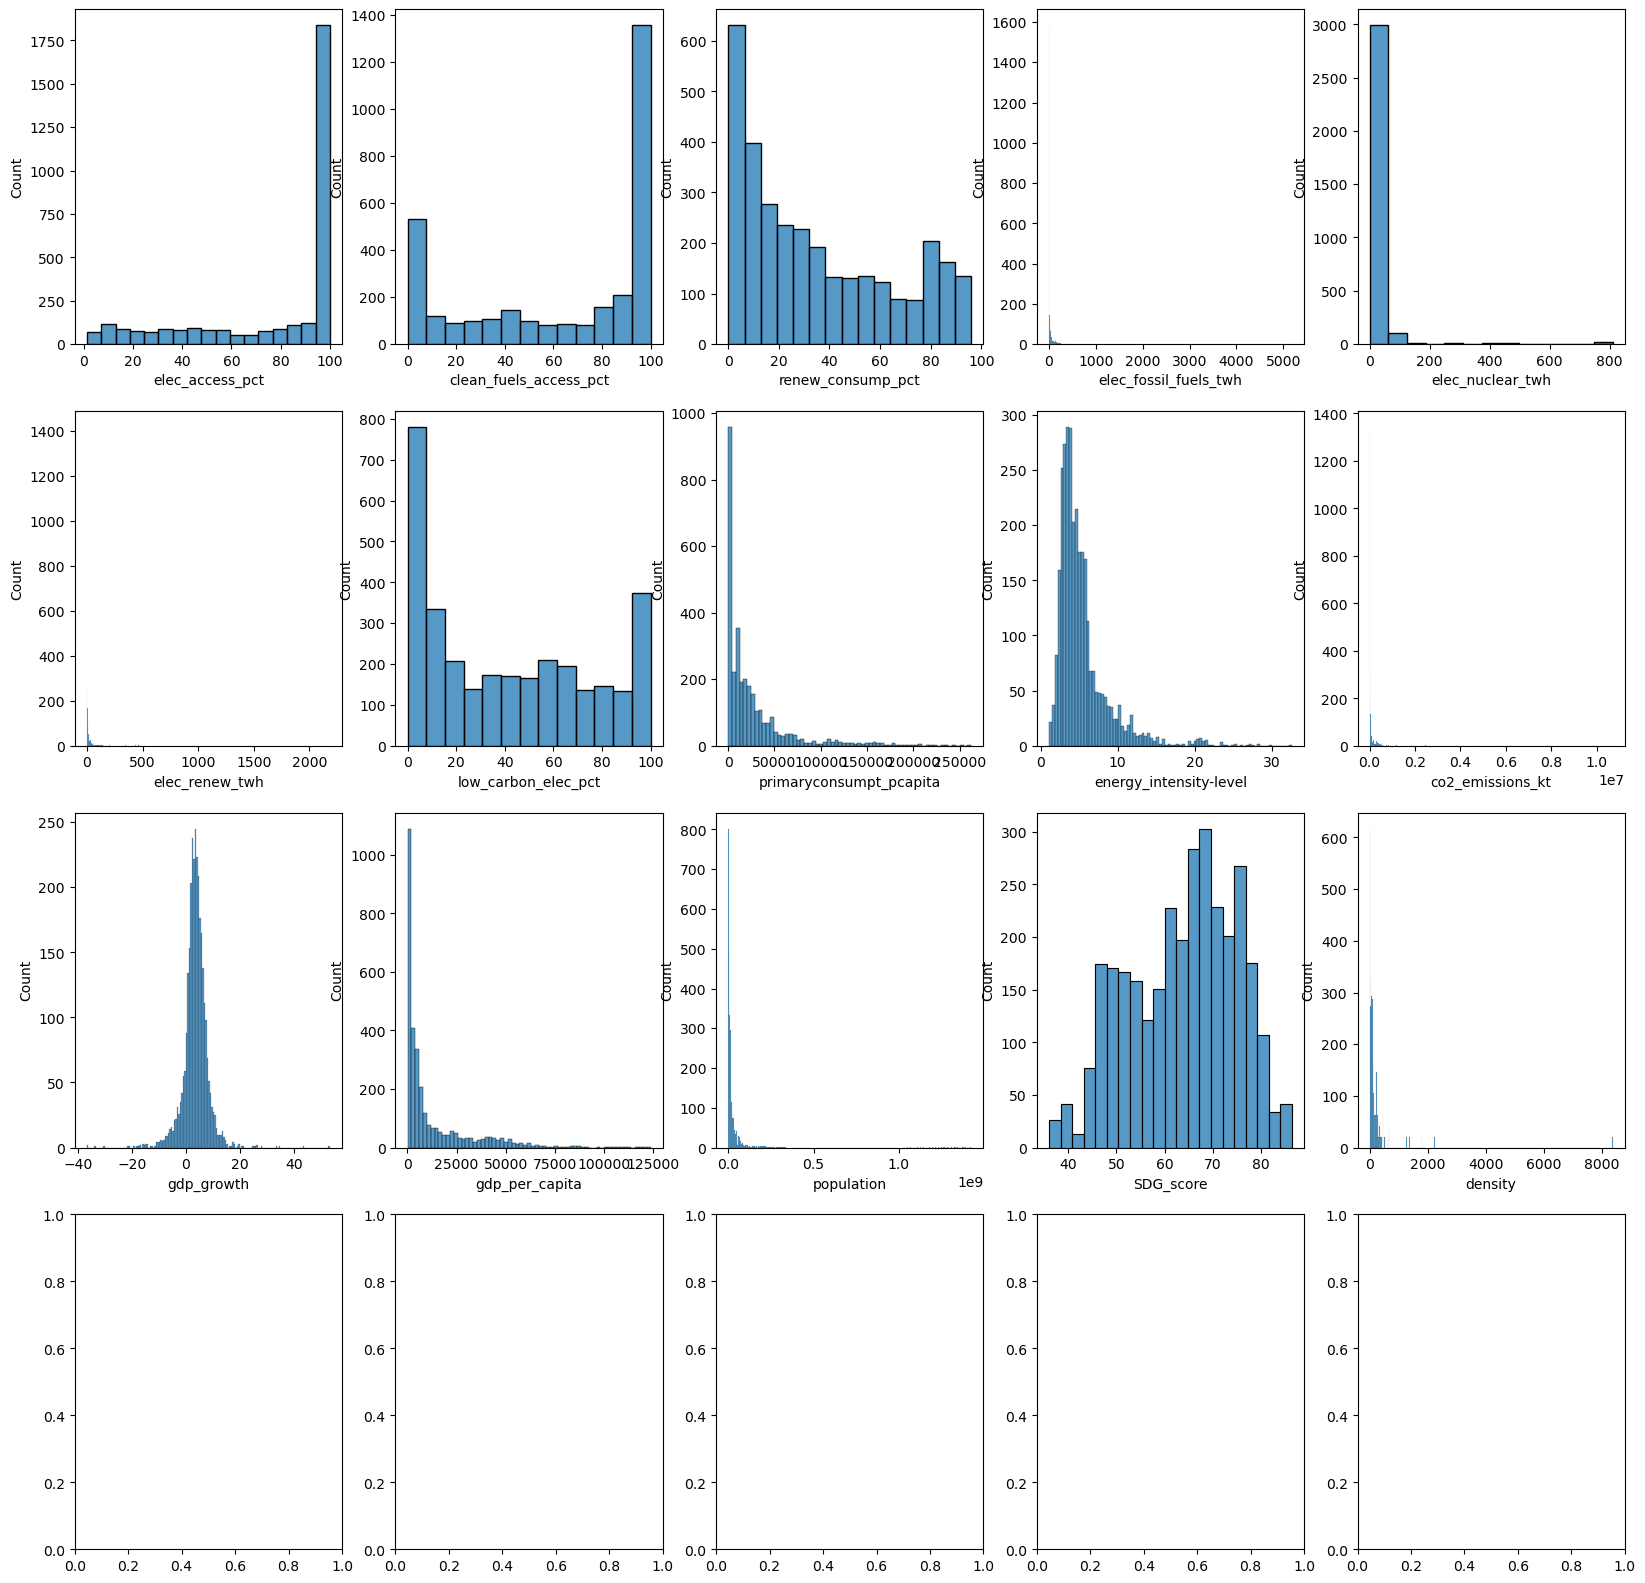

In [677]:
fig, axes = plt.subplots(nrows=4, ncols=5,figsize=(20,20))

for i, column in enumerate(impdf1.columns, 1):
    plt.subplot(4,5,i)
    sns.histplot(impdf1[column])

/Users/michaelguel/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/michaelguel/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/michaelguel/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/michaelguel/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in 

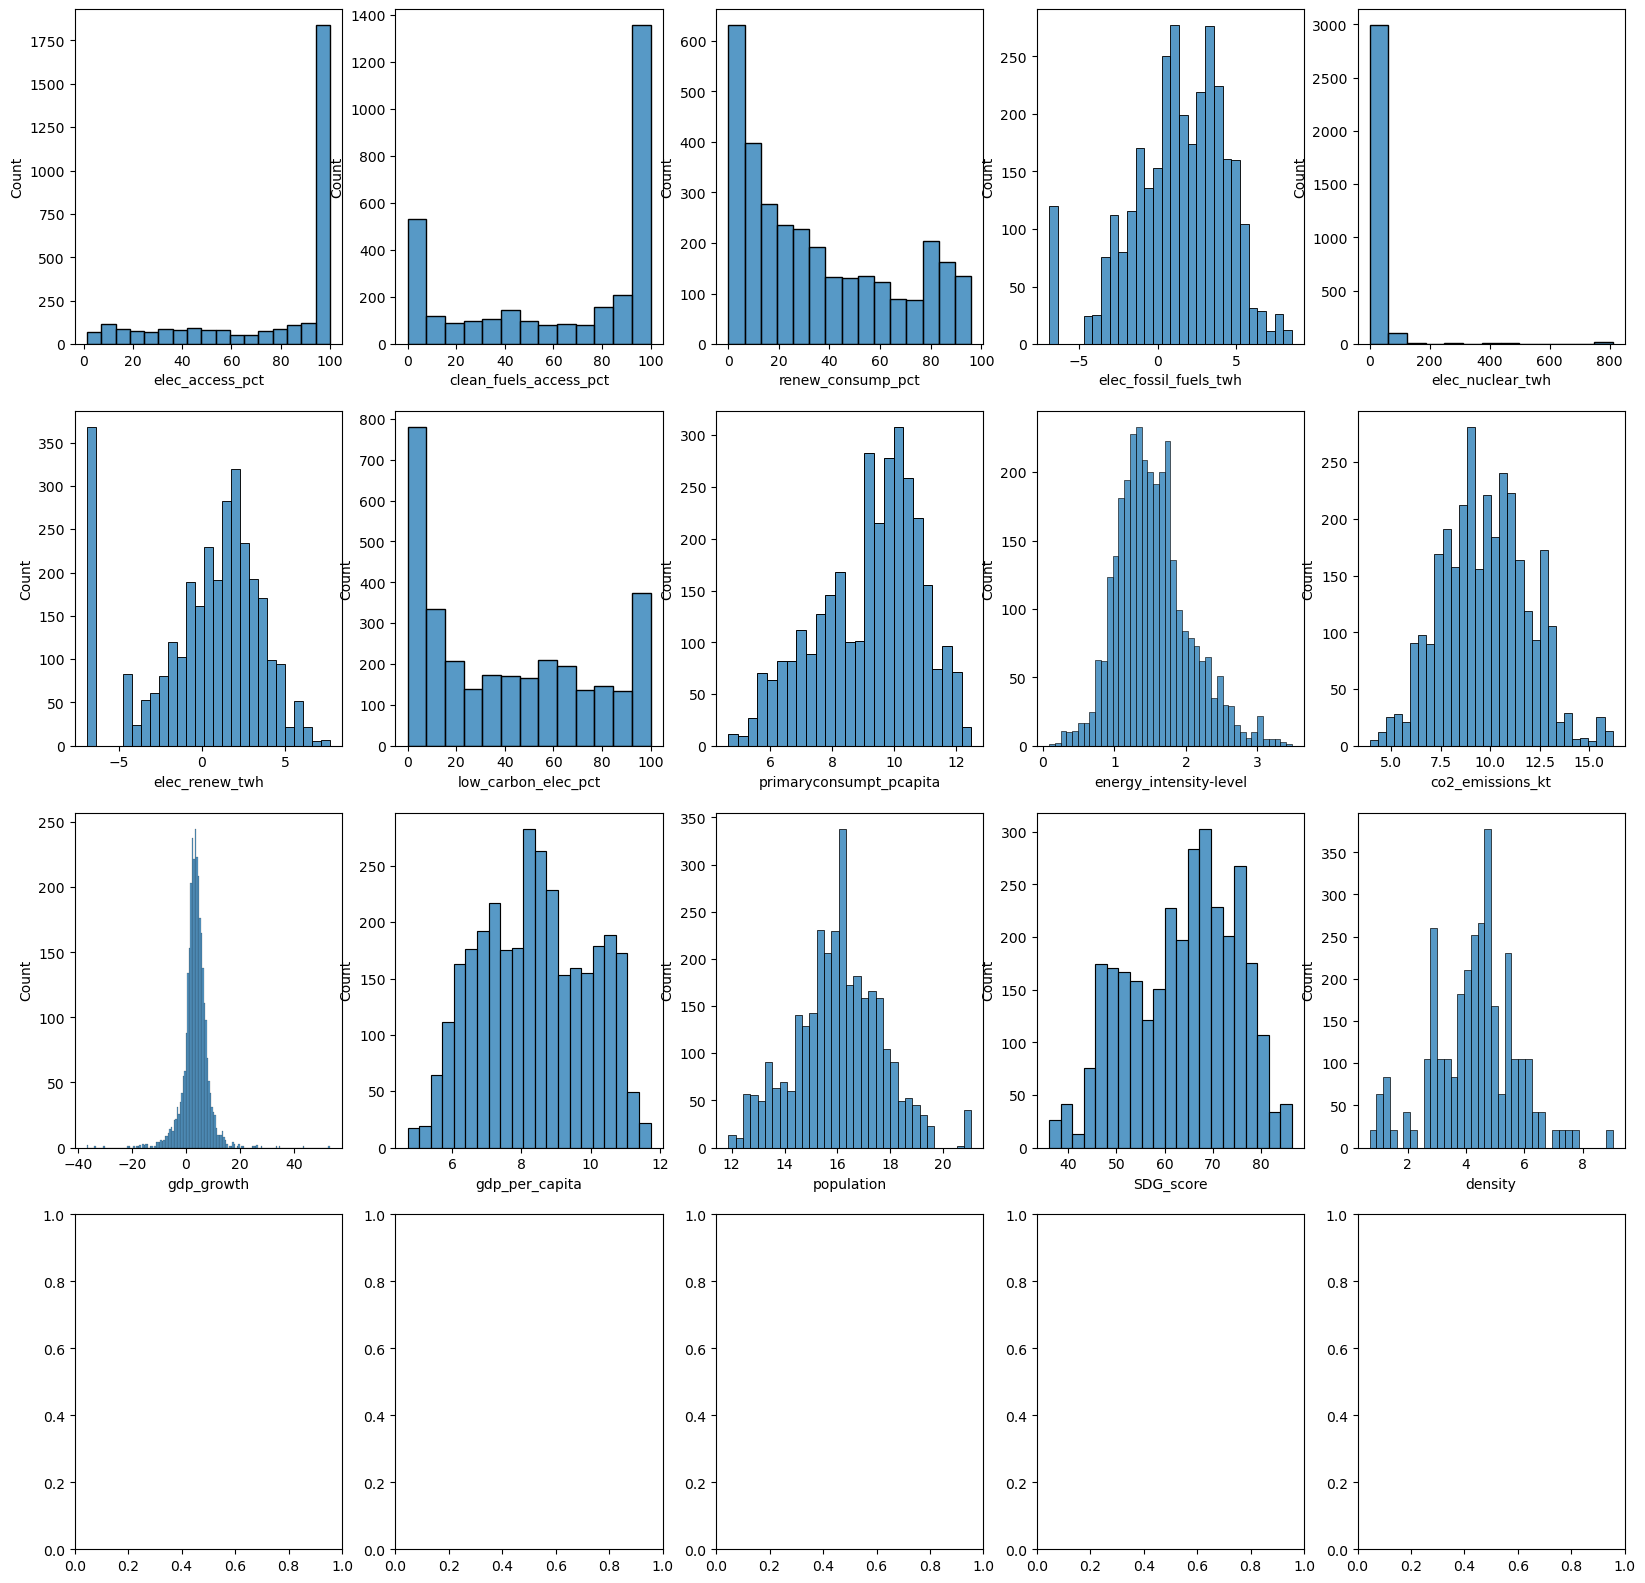

In [678]:
fig, axes = plt.subplots(nrows=4, ncols=5,figsize=(20,20))

for i, column in enumerate(impdf.columns, 1):
    plt.subplot(4,5,i)
    sns.histplot(impdf[column])

In [17]:
impdf = impdf.rename(columns={'energy_intensity-level':'energy_intensity'})

In [18]:
pd.set_option('display.max_rows',None)

takeouty = impdf.iloc[:,np.r_[:13,14]]

vifs = pd.Series(np.linalg.inv(takeouty.corr().to_numpy()).diagonal(),
                index=takeouty.columns,name="VIF")

abs(vifs).sort_values(ascending=False)

co2_emissions_kt           62.833339
population                 35.010157
primaryconsumpt_pcapita    25.292759
gdp_per_capita             10.159898
elec_fossil_fuels_twh       8.963778
clean_fuels_access_pct      8.918500
elec_access_pct             7.391827
renew_consump_pct           7.178187
elec_renew_twh              5.124008
low_carbon_elec_pct         4.760726
energy_intensity            2.269915
elec_nuclear_twh            1.269607
density                     1.214066
gdp_growth                  1.086069
Name: VIF, dtype: float64

In [225]:
col = ['co2_emissions_kt',
      'primaryconsumpt_pcapita',
      'clean_fuels_access_pct',
      'elec_access_pct',
      'elec_fossil_fuels_twh',
      'elec_renew_twh',
      'renew_consump_pct']

# col = []

# ['co2_emissions_kt',
#        'elec_fossil_fuels_twh',
#        'clean_fuels_access_pct',
#        'renew_consump_pct',
#        'primaryconsumpt_pcapita',
#        'elec_renew_twh',
#       'gdp_per_capita',
#       'population',
#       'gdp_growth',
#       'energy_intensity',
#       'low_carbon_elec_pct',
#       'elec_nuclear_twh']

tryagain = takeouty[takeouty.columns[~takeouty.columns.isin(col)]]

vifs = pd.Series(np.linalg.inv(tryagain.corr().to_numpy()).diagonal(),
                index=tryagain.columns,name="VIF")

abs(vifs).sort_values(ascending=False)

gdp_per_capita         1.337529
elec_nuclear_twh       1.232352
energy_intensity       1.181380
population             1.172255
density                1.094864
low_carbon_elec_pct    1.074748
gdp_growth             1.056223
Name: VIF, dtype: float64

In [132]:
target.value_counts()

category
3           1086
2            796
1            687
4            408
0            188
Name: count, dtype: int64

In [133]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from xgboost import plot_importance

In [134]:
tryagain.head()

,elec_nuclear_twh,low_carbon_elec_pct,energy_intensity,gdp_growth,gdp_per_capita,population,density
0,0.0,65.957440,0.495306,7.156191,6.090940,16.794601,4.094345
1,0.0,84.745766,0.554460,7.468072,5.900139,16.781611,4.094345
2,0.0,81.159424,0.337186,7.617574,5.189772,16.809302,4.094345
3,0.0,67.021280,0.337186,8.832278,5.250622,16.908338,4.094345
4,0.0,62.921350,0.183155,1.414118,5.353672,16.961857,4.094345


In [220]:
target = pd.DataFrame()

# bins = pd.IntervalIndex.from_tuples([(0, 34), (34, 66), (66, 86)])
#pd.cut([0, 0.5, 1.5, 2.5, 4.5], bins)

# pd.interval_range(start=0, end=100)
# IntervalIndex([(0, 33], (33, 66], (66, 100]],dtype='interval[int64, right]')))

# IntervalIndex([(1, 3], (5, 8], (10, 12]], dtype='interval[int64, right]')
                                               
#                                                 pd.DataFrame({"X":[1, 2, 3, 4, 5, 6, 7]},             
#                             index = pd.IntervalIndex.from_tuples(
#                             [(0, .5), (.5, 1), (1, 1.5), (1.5, 2), (2, 2.5), (2.5, 3), (3, 3.5)]))
                                               
#                                                pd.DataFrame({"X":[1, 2, 3, 4, 5, 6, 7]},             
#                             index = pd.IntervalIndex.from_arrays(
#                             [0, .5, 1, 1.5, 2, 2.5, 3], [.5, 1, 1.5, 2, 2.5, 3, 3.5]))

target['category'] = pd.cut(np.array(impdf['SDG_score']),5,labels = [1,2,3,4,5]).astype('int')

# print(target)

target = (target - 1).astype('category')

target.value_counts()

category
3           1086
2            796
1            687
4            408
0            188
Name: count, dtype: int64

In [221]:
X = tryagain.copy()

y = target.copy()

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = .30, random_state = 42)

In [212]:
xgb = XGBClassifier(learning_rate=0.05, 
                    n_estimators=1000,
                    max_depth=5)
xgb.fit(X_train, np.ravel(y_train,order='C'))

y_pred = xgb.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %2f%%" % (accuracy * 100.0))

Accuracy: 93.052632%


In [222]:
model = XGBClassifier()
model.fit(X_train, np.ravel(y_train,order='C'))

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %2f%%" % (accuracy * 100.0))

Accuracy: 92.842105%


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

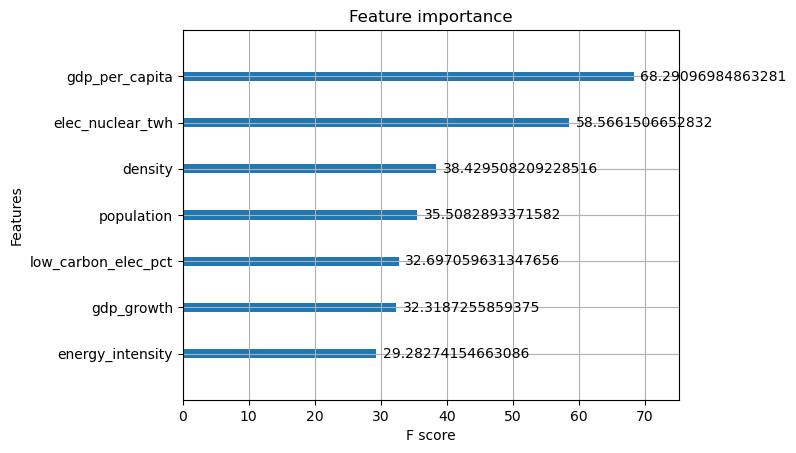

In [223]:
plot_importance(model, importance_type='cover')

In [111]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

# cm = confusion_matrix(y_test, y_pred)

# cm_df = pd.DataFrame(cm,
#                      index = ['SETOSA','VERSICOLR','VIRGINICA'], 
#                      columns = ['SETOSA','VERSICOLR','VIRGINICA'])

# cm

Confusion matrix
[[ 44   6   0   0   0]
 [  5 188   4   0   0]
 [  0  11 231  15   0]
 [  0   0   5 318   2]
 [  0   0   0   9 112]]
Confusion matrix
[[0.88       0.12       0.         0.         0.        ]
 [0.02538071 0.95431472 0.02030457 0.         0.        ]
 [0.         0.04280156 0.89883268 0.05836576 0.        ]
 [0.         0.         0.01538462 0.97846154 0.00615385]
 [0.         0.         0.         0.07438017 0.92561983]]


<Figure size 500x400 with 0 Axes>

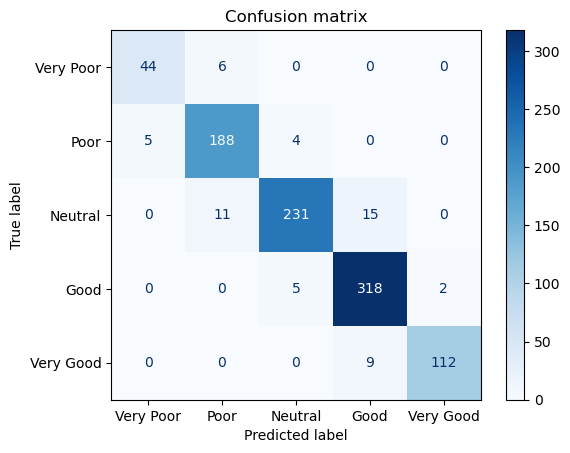

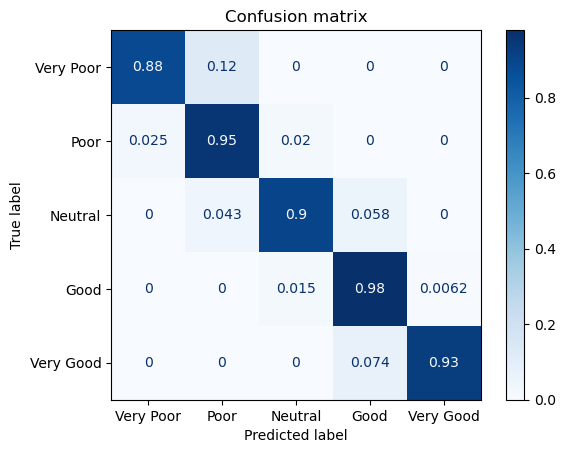

In [197]:
#Plotting the confusion matrix
plt.figure(figsize=(5,4))
# sns.heatmap(cm_df, annot=True)
# plt.title('Confusion Matrix')
# plt.ylabel('Actal Values')
# plt.xlabel('Predicted Values')
# plt.show()

# confusion_matrix = confusion_matrix(y_test, y_pred)

# cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1, 2])

# cm_display.plot()
# plt.show()

class_names = ['Very Poor','Poor', 'Neutral','Good','Very Good']

titles_options = [
    ("Confusion matrix", None),
    ("Confusion matrix", "true"),
]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        xgb,
        X_test,
        y_test,
        display_labels=class_names,
        cmap=plt.cm.Blues,
        normalize=normalize,
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [74]:
# check1 = pd.DataFrame(droppeddata.iloc[:,:2])
# check2 = pd.DataFrame(sdgcomplete.iloc[:,:2])

# check1['combined'] = check1['country'] + check1['year'].astype(str)

# check2['combined'] = check2['Country'] + check2['year'].astype(str)

# np.setdiff1d(check2['combined'],check1['combined'])

array(['Montenegro2000', 'Montenegro2001', 'Montenegro2002',
       'Montenegro2003', 'Montenegro2004', 'Montenegro2005',
       'Montenegro2006', 'Serbia2000', 'Serbia2001', 'Serbia2002',
       'Serbia2003', 'Serbia2004', 'Serbia2005', 'Serbia2006',
       'South Sudan2000', 'South Sudan2001', 'South Sudan2002',
       'South Sudan2003', 'South Sudan2004', 'South Sudan2005',
       'South Sudan2006', 'South Sudan2007', 'South Sudan2008',
       'South Sudan2009', 'South Sudan2010', 'South Sudan2011',
       'South Sudan2012'], dtype=object)

In [ ]:
['Montenegro2000', 'Montenegro2001', 'Montenegro2002',
       'Montenegro2003', 'Montenegro2004', 'Montenegro2005',
       'Montenegro2006', 'Serbia2000', 'Serbia2001', 'Serbia2002',
       'Serbia2003', 'Serbia2004', 'Serbia2005', 'Serbia2006',
       'South Sudan2000', 'South Sudan2001', 'South Sudan2002',
       'South Sudan2003', 'South Sudan2004', 'South Sudan2005',
       'South Sudan2006', 'South Sudan2007', 'South Sudan2008',
       'South Sudan2009', 'South Sudan2010', 'South Sudan2011',
       'South Sudan2012']

In [ ]:
['Antigua and Barbuda', 'Aruba', 'Bermuda', 'Cayman Islands',
       'Dominica', 'Equatorial Guinea', 'Eritrea', 'French Guiana',
       'Grenada', 'Guinea-Bissau', 'Kiribati', 'Libya', 'Nauru',
       'New Caledonia', 'Puerto Rico', 'Saint Kitts and Nevis',
       'Saint Lucia', 'Saint Vincent and the Grenadines', 'Samoa',
       'Seychelles', 'Solomon Islands', 'Tonga', 'Tuvalu', 'Vanuatu']

['Bolivia', 'Brunei Darussalam', 'Cabo Verde', 'Congo, Rep.',
       "Cote d'Ivoire", 'East and South Asia',
       'Eastern Europe and Central Asia', 'Iran, Islamic Rep.',
       'Korea, Rep.', 'Lao PDR', 'Latin America and the Caribbean',
       'Moldova', 'Oceania', 'Russian Federation', 'Sub-Saharan Africa',
       'Syrian Arab Republic', 'Tanzania', 'Venezuela, RB', 'Vietnam']

['Small Island Developing States'
'OECD members',
'Middle East and North Africa',
'Upper-middle-income Countries',
'Lower-middle-income Countries',
'Lower & Lower-middle Income',
'Low-income Countries',
'High-income Countries',
'World']